In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regex

In [14]:
#df = pd.read_csv('df20190513.csv')
df =  pd.read_csv('https://raw.githubusercontent.com/conditg/nba-youth-salary/master/df20190513.csv')

In [15]:
print(df.shape)

(4815, 44)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 44 columns):
UID                 4807 non-null object
Rk                  4589 non-null float64
Player              4806 non-null object
playerid            4806 non-null object
Age                 4639 non-null float64
Tm                  4806 non-null object
Lg                  4806 non-null object
Season              4806 non-null object
G_Totals            4806 non-null float64
GS_Totals           4806 non-null float64
MP_Totals           4806 non-null float64
PER                 4804 non-null float64
3PAr                4797 non-null float64
FTr                 4797 non-null float64
ORB%                4804 non-null float64
DRB%                4804 non-null float64
TRB%                4804 non-null float64
AST%                4804 non-null float64
STL%                4804 non-null float64
BLK%                4804 non-null float64
TOV%                4800 non-null float64
USG%             

In [16]:
df.head()

,UID,Rk,Player,playerid,Age,Tm,Lg,Season,G_Totals,GS_Totals,...,draftpk,SeasonN,DraftTeam,playedForDrafter,YrFirstSeason,DraftEra,Seasonstartyr,Seasonendyr,Salary,Source
0,abdulta011997-98,4414.0,Tariq Abdul-Wahad,abdulta01,23.0,SAC,NBA,1997-98,59.0,16.0,...,11.0,1.0,SAC,Yes,1997.0,HSEra,1997.0,1998.0,"1,226,880.00",bballref
1,abdulta011998-99,4659.0,Tariq Abdul-Wahad,abdulta01,24.0,SAC,NBA,1998-99,49.0,49.0,...,11.0,2.0,SAC,Yes,1997.0,HSEra,1998.0,1999.0,"1,411,000.00",bballref
2,abdulta011999-00,4888.0,Tariq Abdul-Wahad,abdulta01,25.0,TOT,NBA,1999-00,61.0,56.0,...,11.0,3.0,SAC,?,1997.0,HSEra,1999.0,2000.0,"1,594,920.00",bballref
3,abdulta012000-01,5116.0,Tariq Abdul-Wahad,abdulta01,26.0,DEN,NBA,2000-01,29.0,12.0,...,11.0,4.0,SAC,No,1997.0,HSEra,2000.0,2001.0,"4,500,000.00",bballref
4,abdulta012001-02,5352.0,Tariq Abdul-Wahad,abdulta01,27.0,TOT,NBA,2001-02,24.0,12.0,...,11.0,5.0,SAC,?,1997.0,HSEra,2001.0,2002.0,"5,062,500.00",bballref


In [5]:
df.describe()

,Rk,Age,G_Totals,GS_Totals,MP_Totals,PER,3PAr,FTr,ORB%,DRB%,...,DBPM,BPM,VORP,draftyr,draftrd,draftpk,SeasonN,YrFirstSeason,Seasonstartyr,Seasonendyr
count,4589.000000,4639.000000,4806.000000,4806.000000,4806.000000,4804.000000,4797.000000,4797.000000,4804.000000,4804.000000,...,4806.000000,4806.000000,4806.000000,4801.000000,4801.000000,4801.000000,4639.000000,4639.000000,4806.000000,4806.000000
mean,3235.376553,23.556370,51.800250,23.931752,1190.738244,12.283451,0.184519,0.302889,6.032681,13.681578,...,-0.445859,-2.079734,0.505993,2004.117267,1.348261,24.195168,2.757275,2004.346411,2006.178527,2007.178527
std,1751.058592,2.246218,26.437999,28.482032,922.433832,6.562827,0.186481,0.203216,4.930301,6.575133,...,2.052222,4.436946,1.255031,6.877938,0.476469,15.438373,1.407236,6.840957,6.653625,6.653625
min,202.000000,18.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,-23.100000,-86.700000,-2.600000,1986.000000,1.000000,1.000000,1.000000,1986.000000,1995.000000,1996.000000
25%,1750.000000,22.000000,31.000000,0.000000,336.000000,9.700000,0.006000,0.191000,2.400000,9.500000,...,-1.500000,-3.900000,-0.200000,1998.000000,1.000000,11.000000,1.000000,1999.000000,2000.000000,2001.000000
50%,3193.000000,23.000000,59.000000,9.000000,1069.000000,12.800000,0.144000,0.279000,5.000000,13.200000,...,-0.400000,-1.500000,0.000000,2004.000000,1.000000,22.000000,3.000000,2004.000000,2006.000000,2007.000000
75%,4642.000000,25.000000,75.000000,46.000000,1922.500000,15.700000,0.324000,0.390000,9.100000,18.000000,...,0.700000,0.200000,0.800000,2010.000000,2.000000,36.000000,4.000000,2010.000000,2012.000000,2013.000000
max,7958.000000,34.000000,84.000000,82.000000,3464.000000,129.100000,1.000000,4.000000,100.000000,57.700000,...,12.100000,24.800000,10.100000,2017.000000,2.000000,60.000000,10.000000,2017.000000,2017.000000,2018.000000


# Exploratory Data Analysis

In [6]:
#Create a version of the dataframe with no NaN values for plotting
cleandf = df.dropna(how='any').copy()

### Age

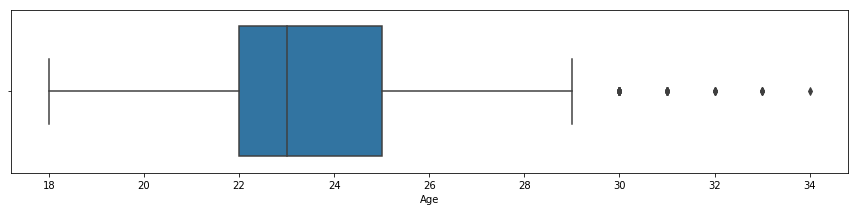

In [7]:
#Age should be in between 17 - 40
plt.figure(figsize=[15,3])
sns.boxplot(x=cleandf.Age)
plt.show()

#### The above chart suggests there are some players who were still in the league in their 30s, but still in one of their first 5 seasons. Need to spot check those outliers over 30

### Win Shares

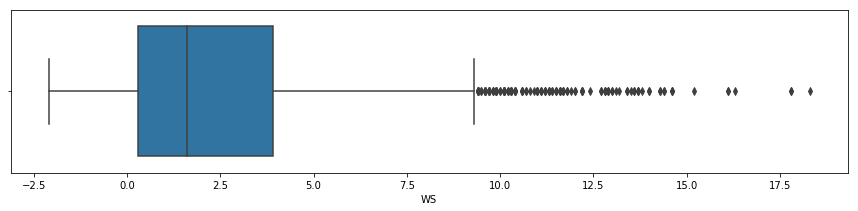

In [8]:
#WinShare outliers should be usual suspects
plt.figure(figsize=[15,3])
sns.boxplot(x=cleandf['WS'])
plt.show()

In [9]:
#Let's check to see who the outliers are:
#HIGH -- we'd expect this to be the 4th and 5th years of
#all time greats who played well with high volume:
cleandf[cleandf['WS']>14]

,UID,Rk,Player,playerid,Age,Tm,Lg,Season,G_Totals,GS_Totals,...,draftpk,SeasonN,DraftTeam,playedForDrafter,YrFirstSeason,DraftEra,Seasonstartyr,Seasonendyr,Salary,Source
1193,duncati012001-02,5407.0,Tim Duncan,duncati01,25.0,SAS,NBA,2001-02,82.0,82.0,...,1.0,5.0,SAS,Yes,1997.0,HSEra,2001.0,2002.0,10865250.00,bballref
1203,duranke012009-10,2461.0,Kevin Durant,duranke01,21.0,OKC,NBA,2009-10,82.0,82.0,...,2.0,3.0,SEA,Yes,2007.0,1&DoneEra,2009.0,2010.0,4796880.00,bballref
1565,goberru012016-17,1173.0,Rudy Gobert,goberru01,24.0,UTA,NBA,2016-17,81.0,81.0,...,27.0,4.0,DEN,No,2013.0,1&DoneEra,2016.0,2017.0,2121288.00,bballref
1740,hardaan011995-96,5928.0,Anfernee Hardaway,hardaan01,24.0,ORL,NBA,1995-96,82.0,82.0,...,3.0,3.0,GSW,No,1993.0,HSEra,1995.0,1996.0,5230000.00,bballref
1922,hillgr011996-97,5679.0,Grant Hill,hillgr01,24.0,DET,NBA,1996-97,80.0,80.0,...,3.0,3.0,DET,Yes,1994.0,HSEra,1996.0,1997.0,5025000.00,bballref
2158,jamesle012004-05,3252.0,LeBron James,jamesle01,20.0,CLE,NBA,2004-05,80.0,80.0,...,1.0,2.0,CLE,Yes,2003.0,HSEra,2004.0,2005.0,4320360.00,bballref
2159,jamesle012005-06,3518.0,LeBron James,jamesle01,21.0,CLE,NBA,2005-06,79.0,79.0,...,1.0,3.0,CLE,Yes,2003.0,HSEra,2005.0,2006.0,4621800.00,bballref
2161,jamesle012007-08,4048.0,LeBron James,jamesle01,23.0,CLE,NBA,2007-08,75.0,74.0,...,1.0,5.0,CLE,Yes,2003.0,HSEra,2007.0,2008.0,13041250.00,bballref
3199,nowitdi012000-01,4818.0,Dirk Nowitzki,nowitdi01,22.0,DAL,NBA,2000-01,82.0,82.0,...,9.0,3.0,MIL,No,1998.0,HSEra,2000.0,2001.0,1693560.00,bballref
3201,nowitdi012002-03,5264.0,Dirk Nowitzki,nowitdi01,24.0,DAL,NBA,2002-03,80.0,80.0,...,9.0,5.0,MIL,No,1998.0,HSEra,2002.0,2003.0,10067750.00,bballref


In [10]:
#LOW:
#We'd expect this to be mediocre players who were perceived as stars, and therefore
#got a lot of playing time - enough to get a deeply negative Win share
cleandf[cleandf['WS']<-1]

,UID,Rk,Player,playerid,Age,Tm,Lg,Season,G_Totals,GS_Totals,...,draftpk,SeasonN,DraftTeam,playedForDrafter,YrFirstSeason,DraftEra,Seasonstartyr,Seasonendyr,Salary,Source
209,aventan011995-96,6341.0,Anthony Avent,aventan01,26.0,VAN,NBA,1995-96,71.0,32.0,...,15.0,4.0,ATL,No,1992.0,HSEra,1995.0,1996.0,950000.00,bballref
331,beaslmi012012-13,2656.0,Michael Beasley,beaslmi01,24.0,PHO,NBA,2012-13,75.0,20.0,...,2.0,5.0,MIA,No,2008.0,1&DoneEra,2012.0,2013.0,5750000.00,bballref
725,carrco011998-99,5147.0,Cory Carr,carrco01,23.0,CHI,NBA,1998-99,42.0,7.0,...,49.0,1.0,ATL,No,1998.0,HSEra,1998.0,1999.0,287500.00,bballref
968,daniean011997-98,4474.0,Antonio Daniels,daniean01,22.0,VAN,NBA,1997-98,74.0,50.0,...,4.0,1.0,VAN,Yes,1997.0,HSEra,1997.0,1998.0,2149920.00,bballref
1382,flynnjo012010-11,2241.0,Jonny Flynn,flynnjo01,21.0,MIN,NBA,2010-11,53.0,8.0,...,6.0,2.0,MIN,Yes,2009.0,1&DoneEra,2010.0,2011.0,3192000.00,bballref
1649,greendo012008-09,1992.0,Donte Greene,greendo01,20.0,SAC,NBA,2008-09,55.0,4.0,...,28.0,1.0,MEM,No,2008.0,1&DoneEra,2008.0,2009.0,971160.00,bballref
2898,mercero012001-02,5484.0,Ron Mercer,mercero01,25.0,TOT,NBA,2001-02,53.0,41.0,...,6.0,5.0,BOS,?,1997.0,HSEra,2001.0,2002.0,6750000.00,bballref
2923,milesda012002-03,4311.0,Darius Miles,milesda01,21.0,CLE,NBA,2002-03,67.0,62.0,...,3.0,3.0,LAC,No,2000.0,HSEra,2002.0,2003.0,3267960.00,bballref
3020,morriad012006-07,2560.0,Adam Morrison,morriad01,22.0,CHA,NBA,2006-07,78.0,23.0,...,3.0,1.0,CHA,Yes,2006.0,1&DoneEra,2006.0,2007.0,3616680.00,bballref
3057,mudiaem012015-16,418.0,Emmanuel Mudiay,mudiaem01,19.0,DEN,NBA,2015-16,68.0,66.0,...,7.0,1.0,DEN,Yes,2015.0,1&DoneEra,2015.0,2016.0,3102240.00,bballref


### Salary initial check

In [11]:
#If I've set this up right, we'd expect a pretty intense increase in salaries over the years

In [11]:
#function to clean salaries as identified throughout analysis
def clean_sal(salary):
    salary = salary.strip()
    salary = re.sub(',', '', salary) # remove commas
    return salary

In [12]:
cleandf.loc[:,'Salary'] = [clean_sal(x) for x in cleandf['Salary']]

#Change data type from string to float
cleandf['Salary'] = cleandf['Salary'].astype('float')

#Change year to an int for clean plotting
cleandf['yr'] = cleandf.Seasonstartyr.astype('int')

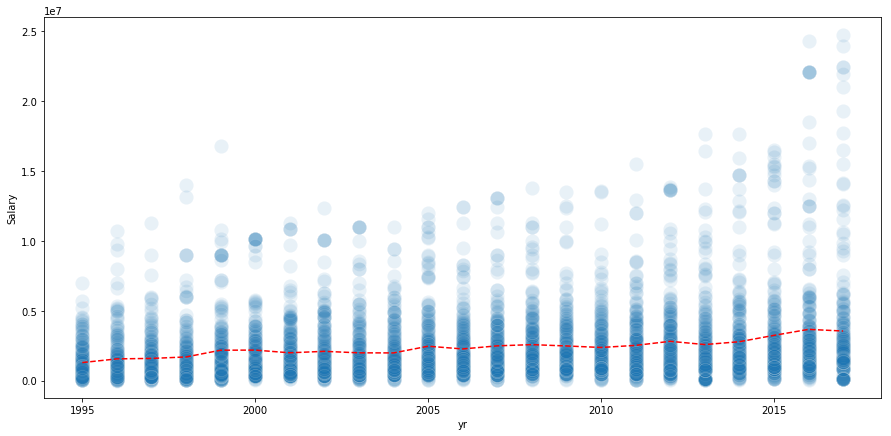

In [13]:
plt.figure(figsize=[15,7])
sns.scatterplot(x=cleandf.yr,y=cleandf.Salary, 
                alpha=.1, s=200)
plt.plot(cleandf.groupby('yr')['Salary'].mean(),
        color='red', linestyle='--')
plt.show()

In [56]:
#First-year Salary by draft position should also make sense:
first_round = cleandf[cleandf.draftrd==1].copy()
first_round_rookies = first_round[first_round.SeasonN==1]
print(first_round_rookies.shape)

(662, 46)


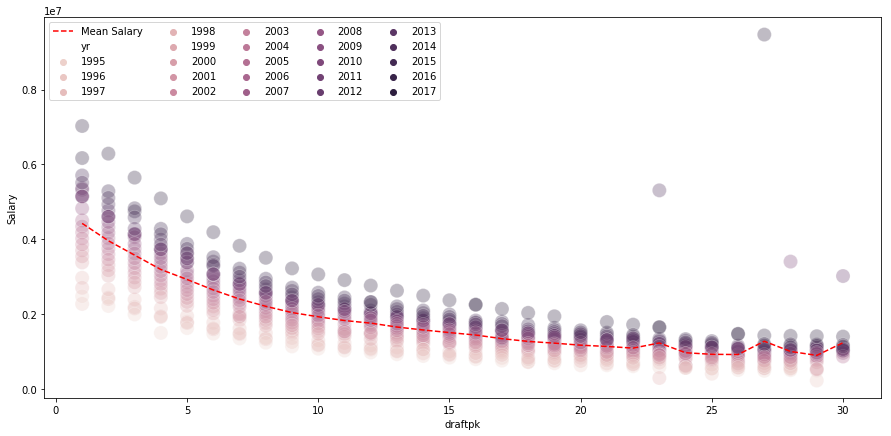

In [57]:
plt.figure(figsize=[15,7])
sns.scatterplot(x=first_round_rookies.draftpk,y=first_round_rookies.Salary, 
                alpha=.3, s=200, hue=first_round.yr, legend='full')
plt.plot(first_round_rookies.groupby('draftpk')['Salary'].mean(),
        color='red', linestyle='--', label='Mean Salary')
plt.legend(ncol=5)
plt.show()

In [58]:
#May need to investigate some of these late draft picks with high salaries

In [18]:
first_round_rookies[(first_round_rookies.draftpk>20) & (first_round_rookies.Salary > 2000000)]

NameError: name 'first_round_rookies' is not defined

In [20]:
cleandf.columns

Index(['UID', 'Rk', 'Player', 'playerid', 'Age', 'Tm', 'Lg', 'Season',
       'G_Totals', 'GS_Totals', 'MP_Totals', 'PER', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'draftyr',
       'draftrd', 'draftpk', 'SeasonN', 'DraftTeam', 'playedForDrafter',
       'YrFirstSeason', 'DraftEra', 'Seasonstartyr', 'Seasonendyr', 'Salary',
       'Source', 'yr'],
      dtype='object')

In [24]:
cleandf.groupby('Source')['Salary'].agg('count')

Source
 05-06 salary used                                                                   1
 80% of following year                                                               1
 assumed 80% of contract's second year                                               1
 bballref                                                                         4404
 full minimum contract assumed                                                       5
 imputed - average of prior and following years                                     41
 late 2nd rd assumption: 100k                                                       41
 minimum contract divided by games played                                           62
 paid for 2 season prior to this (no games played), so I've included all here        1
 rookie scale                                                                        6
 two way contract assumption                                                        16
 used 10-11 salary (same contract)  

In [25]:
cleandf

,UID,Rk,Player,playerid,Age,Tm,Lg,Season,G_Totals,GS_Totals,...,SeasonN,DraftTeam,playedForDrafter,YrFirstSeason,DraftEra,Seasonstartyr,Seasonendyr,Salary,Source,yr
0,abdulta011997-98,4414.0,Tariq Abdul-Wahad,abdulta01,23.0,SAC,NBA,1997-98,59.0,16.0,...,1.0,SAC,Yes,1997.0,HSEra,1997.0,1998.0,1226880.00,bballref,1997
1,abdulta011998-99,4659.0,Tariq Abdul-Wahad,abdulta01,24.0,SAC,NBA,1998-99,49.0,49.0,...,2.0,SAC,Yes,1997.0,HSEra,1998.0,1999.0,1411000.00,bballref,1998
2,abdulta011999-00,4888.0,Tariq Abdul-Wahad,abdulta01,25.0,TOT,NBA,1999-00,61.0,56.0,...,3.0,SAC,?,1997.0,HSEra,1999.0,2000.0,1594920.00,bballref,1999
3,abdulta012000-01,5116.0,Tariq Abdul-Wahad,abdulta01,26.0,DEN,NBA,2000-01,29.0,12.0,...,4.0,SAC,No,1997.0,HSEra,2000.0,2001.0,4500000.00,bballref,2000
4,abdulta012001-02,5352.0,Tariq Abdul-Wahad,abdulta01,27.0,TOT,NBA,2001-02,24.0,12.0,...,5.0,SAC,?,1997.0,HSEra,2001.0,2002.0,5062500.00,bballref,2001
5,abdursh011996-97,4660.0,Shareef Abdur-Rahim,abdursh01,20.0,VAN,NBA,1996-97,80.0,71.0,...,1.0,VAN,Yes,1996.0,HSEra,1996.0,1997.0,2186000.00,bballref,1996
6,abdursh011997-98,4889.0,Shareef Abdur-Rahim,abdursh01,21.0,VAN,NBA,1997-98,82.0,82.0,...,2.0,VAN,Yes,1996.0,HSEra,1997.0,1998.0,2513760.00,rookie scale,1997
7,abdursh011998-99,5117.0,Shareef Abdur-Rahim,abdursh01,22.0,VAN,NBA,1998-99,50.0,50.0,...,3.0,VAN,Yes,1996.0,HSEra,1998.0,1999.0,2841720.00,rookie scale,1998
8,abdursh011999-00,5353.0,Shareef Abdur-Rahim,abdursh01,23.0,VAN,NBA,1999-00,82.0,82.0,...,4.0,VAN,Yes,1996.0,HSEra,1999.0,2000.0,9000000.00,bballref,1999
9,abdursh012000-01,5591.0,Shareef Abdur-Rahim,abdursh01,24.0,VAN,NBA,2000-01,81.0,81.0,...,5.0,VAN,Yes,1996.0,HSEra,2000.0,2001.0,10130000.00,bballref,2000
